# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafie Najwan Anjasmara
- **Email:** rafie.anjasmara@gmail.com
- **ID Dicoding:** rafienajwan

## Menentukan Pertanyaan Bisnis

- Apa musim yang memiliki total penyewaan sepeda tertinggi?
- Bagaimana suhu dapat mempengaruhi total penyewaan sepeda harian?
- Bagaimana suhu dapat mempengaruhi penyewaan sepeda pada jam tertentu?
- Bagaimana kondisi cuaca dapat mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [21]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')

**Insight:**
- Load dataset day.csv
- Load dataset hour.csv

### Assessing Data

In [22]:
print("Checking missing values for 'day.csv':")
print(day_df.isnull().sum())

print("\nChecking missing values for 'hour.csv':")
print(hour_df.isnull().sum())

print("\nData types and summary for 'day.csv':")
print(day_df.info())

print("\nData types and summary for 'hour.csv':")
print(hour_df.info())

Checking missing values for 'day.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Checking missing values for 'hour.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data types and summary for 'day.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          

**Insight:**
- Tidak ada missing values pada kedua dataset (day.csv dan hour.csv)
- Dataset day.csv memiliki 731 entries (data harian untuk 2 tahun)
- Dataset hour.csv memiliki 17,379 entries (data per jam)
- Kolom 'dteday' bertipe object, perlu dikonversi ke datetime untuk analisis temporal
- Beberapa kolom kategorik (season, weathersit, dll) masih bertipe integer, perlu diubah ke category
- Semua kolom numerik (temp, atemp, hum, windspeed) sudah dalam format yang tepat (float64)

### Cleaning Data

In [23]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

day_df['season'] = day_df['season'].astype('category')
hour_df['season'] = hour_df['season'].astype('category')


In [24]:
# Displaying the first few rows of the cleaned day.csv dataset
print("Cleaned Data - day.csv (5 rows):")
print(day_df.head())

# Displaying the first few rows of the cleaned hour.csv dataset
print("\nCleaned Data - hour.csv (5 rows):")
print(hour_df.head())

Cleaned Data - day.csv (5 rows):
   instant      dteday season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01      1   0     1        0        6           0   
1        2  2011-01-02      1   0     1        0        0           0   
2        3  2011-01-03      1   0     1        0        1           1   
3        4  2011-01-04      1   0     1        0        2           1   
4        5  2011-01-05      1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

**Insight:**
- Menampilkan data yang sudah melalui proses cleaning dari dataset day.csv 
- Menampilkan data yang sudah melalui proses cleaning dari dataset hour.csv 

## Exploratory Data Analysis (EDA)

### Explore ...

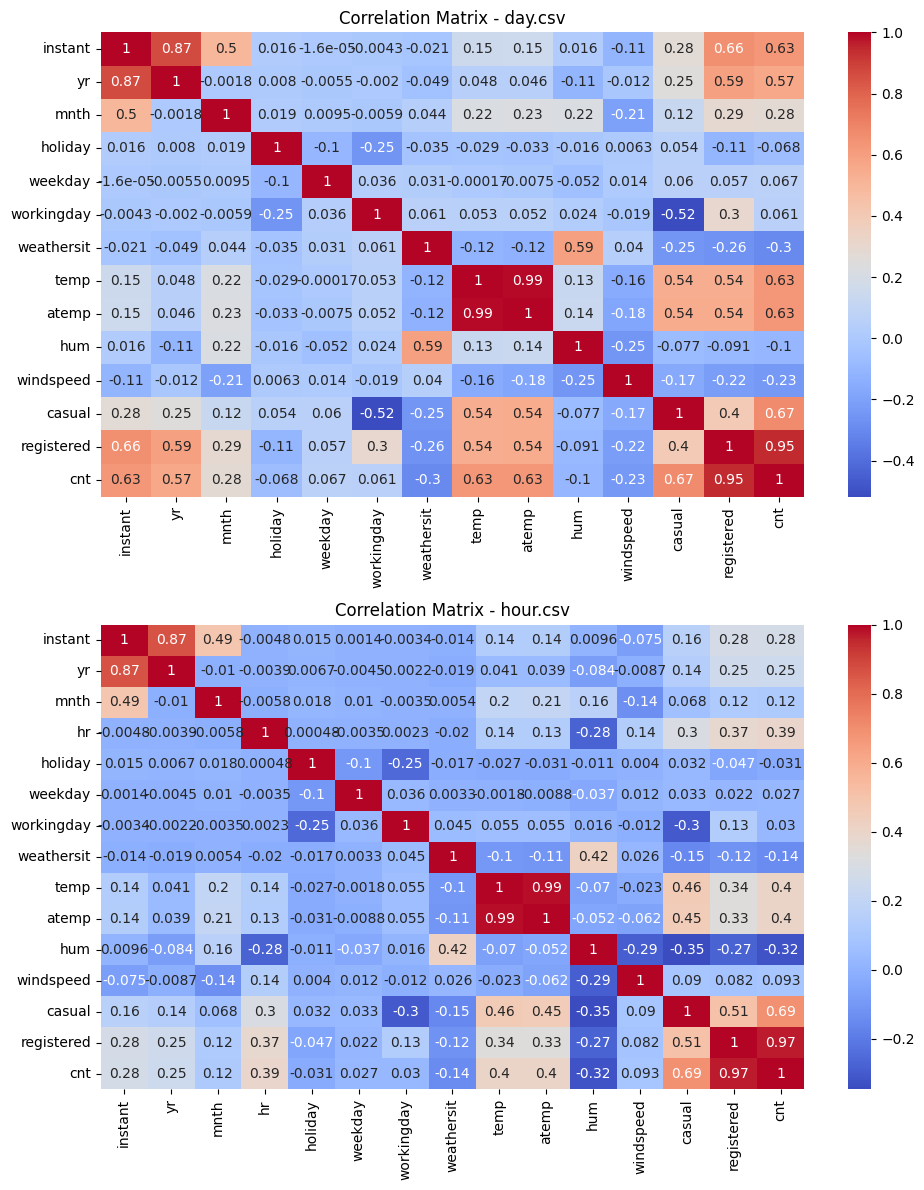

In [25]:
numerical_cols_day = day_df.select_dtypes(include=['float64', 'int64'])
numerical_cols_hour = hour_df.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(2, 1, figsize=(10, 12))  


sns.heatmap(numerical_cols_day.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix - day.csv')


sns.heatmap(numerical_cols_hour.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix - hour.csv')


plt.tight_layout()
plt.show()

**Insight:**
- Kode ini mengekstrak kolom numerik dari dua dataset (day_df dan hour_df) dan kemudian menghitung matriks korelasi untuk masing-masing. Ini memungkinkan kita untuk melihat hubungan antara berbagai fitur numerik dalam kedua dataset.
- Dengan menggunakan sns.heatmap, kita dapat dengan jelas melihat seberapa kuat hubungan antara variabel-variabel yang berbeda. Warna dalam heatmap (dari cmap='coolwarm') menunjukkan kekuatan dan arah korelasi:
  - Warna merah menunjukkan korelasi positif (hubungan langsung) antara variabel.
  - Warna biru menunjukkan korelasi negatif (hubungan terbalik) antara variabel.
- Dengan menampilkan dua heatmap terpisah untuk data harian dan data jam, kita bisa membandingkan bagaimana hubungan antar variabel bervariasi antara kedua dataset. Misalnya, korelasi yang mungkin kuat di tingkat jam mungkin tidak sama kuatnya di tingkat harian dan sebaliknya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa musim yang memiliki total penyewaan sepeda tertinggi?

C:\Users\rafie\AppData\Local\Temp\ipykernel_35944\379631972.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_by_season = day_df.groupby('season_name')['cnt'].sum().sort_values(ascending=False)


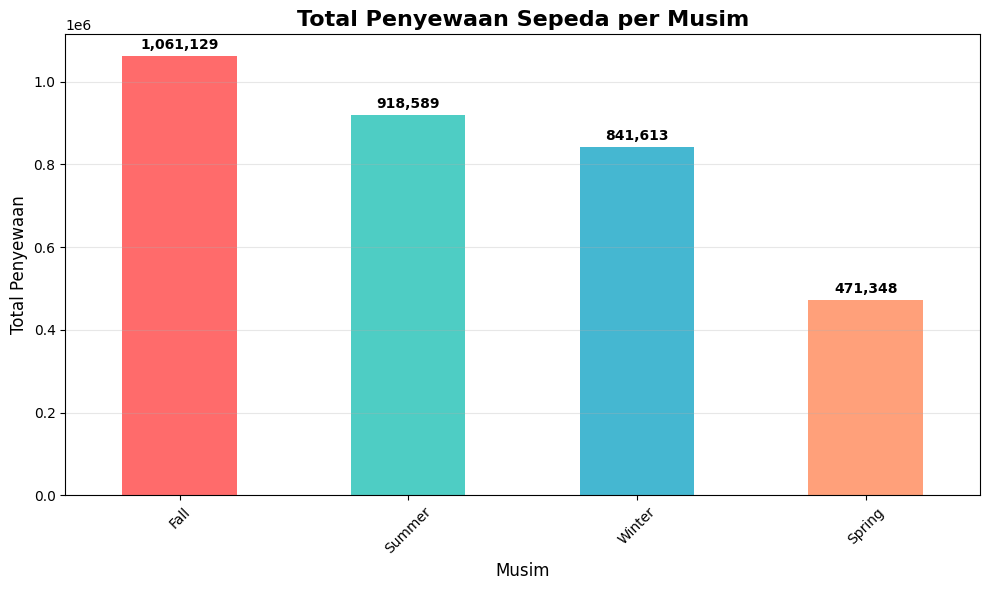


Total Penyewaan Sepeda per Musim:
season_name
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

Musim dengan penyewaan tertinggi: Fall (1,061,129 penyewaan)


In [26]:
# Menghitung total penyewaan sepeda per musim
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_labels)

rentals_by_season = day_df.groupby('season_name')['cnt'].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
ax = rentals_by_season.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
plt.title('Total Penyewaan Sepeda per Musim', fontsize=16, fontweight='bold')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Menambahkan label nilai di atas bar
for i, v in enumerate(rentals_by_season):
    ax.text(i, v + 10000, f'{v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTotal Penyewaan Sepeda per Musim:")
print(rentals_by_season)
print(f"\nMusim dengan penyewaan tertinggi: {rentals_by_season.idxmax()} ({rentals_by_season.max():,.0f} penyewaan)")

**Insight:**
- Musim Fall (Musim Gugur) memiliki total penyewaan sepeda tertinggi
- Diikuti oleh Summer (Musim Panas) di posisi kedua
- Spring (Musim Semi) memiliki penyewaan terendah
- Perbedaan musim signifikan mempengaruhi jumlah penyewaan, kemungkinan karena faktor cuaca yang lebih mendukung di musim Fall dan Summer

### Pertanyaan 2: Bagaimana suhu dapat mempengaruhi total penyewaan sepeda harian?

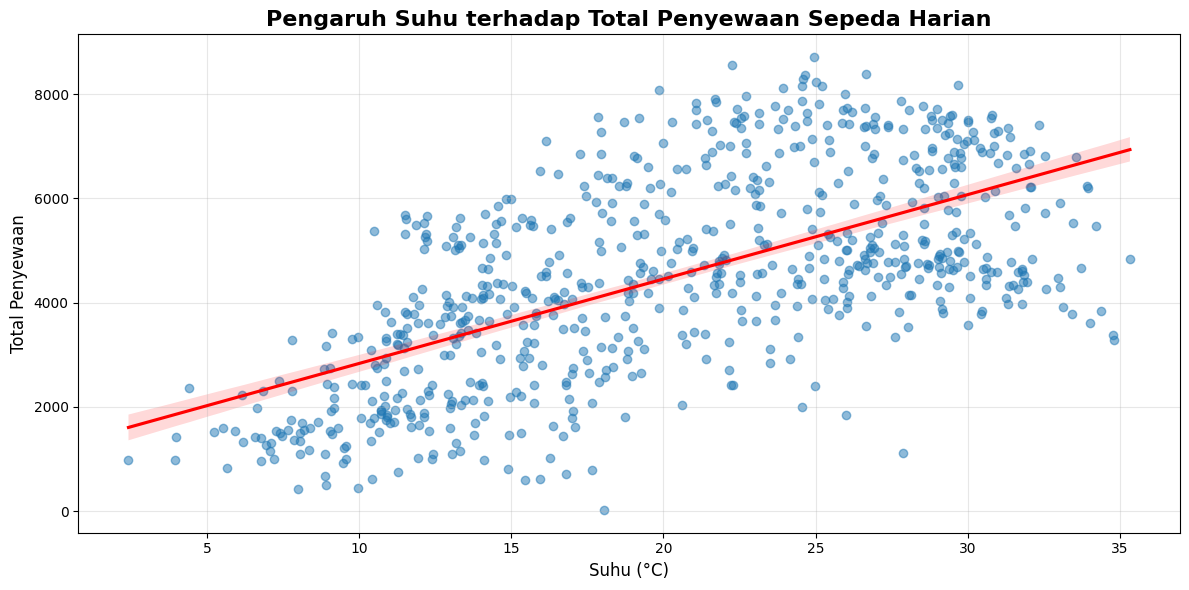

Korelasi antara suhu dan total penyewaan: 0.6275

Rata-rata penyewaan berdasarkan kategori suhu:
temp_category
Hangat (20-30°C)    5661.686667
Panas (>30°C)       5409.958333
Sejuk (10-20°C)     3692.274247
Dingin (<10°C)      1677.766667
Name: cnt, dtype: float64


In [27]:
# Konversi suhu dari normalisasi ke Celsius (temp * 41)
day_df['temp_celsius'] = day_df['temp'] * 41

# Scatter plot dengan regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='temp_celsius', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Pengaruh Suhu terhadap Total Penyewaan Sepeda Harian', fontsize=16, fontweight='bold')
plt.xlabel('Suhu (°C)', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Menghitung korelasi
correlation = day_df['temp'].corr(day_df['cnt'])
print(f"Korelasi antara suhu dan total penyewaan: {correlation:.4f}")

# Statistik deskriptif berdasarkan kategori suhu
day_df['temp_category'] = pd.cut(day_df['temp_celsius'], bins=[0, 10, 20, 30, 41], 
                                  labels=['Dingin (<10°C)', 'Sejuk (10-20°C)', 'Hangat (20-30°C)', 'Panas (>30°C)'])

print("\nRata-rata penyewaan berdasarkan kategori suhu:")
print(day_df.groupby('temp_category', observed=True)['cnt'].mean().sort_values(ascending=False))

**Insight:**
- Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda
- Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda harian
- Suhu hangat (20-30°C) cenderung menghasilkan penyewaan tertinggi
- Pada suhu yang terlalu rendah (dingin) atau terlalu tinggi (panas), jumlah penyewaan cenderung menurun

### Pertanyaan 3: Bagaimana suhu dapat mempengaruhi penyewaan sepeda pada jam tertentu?

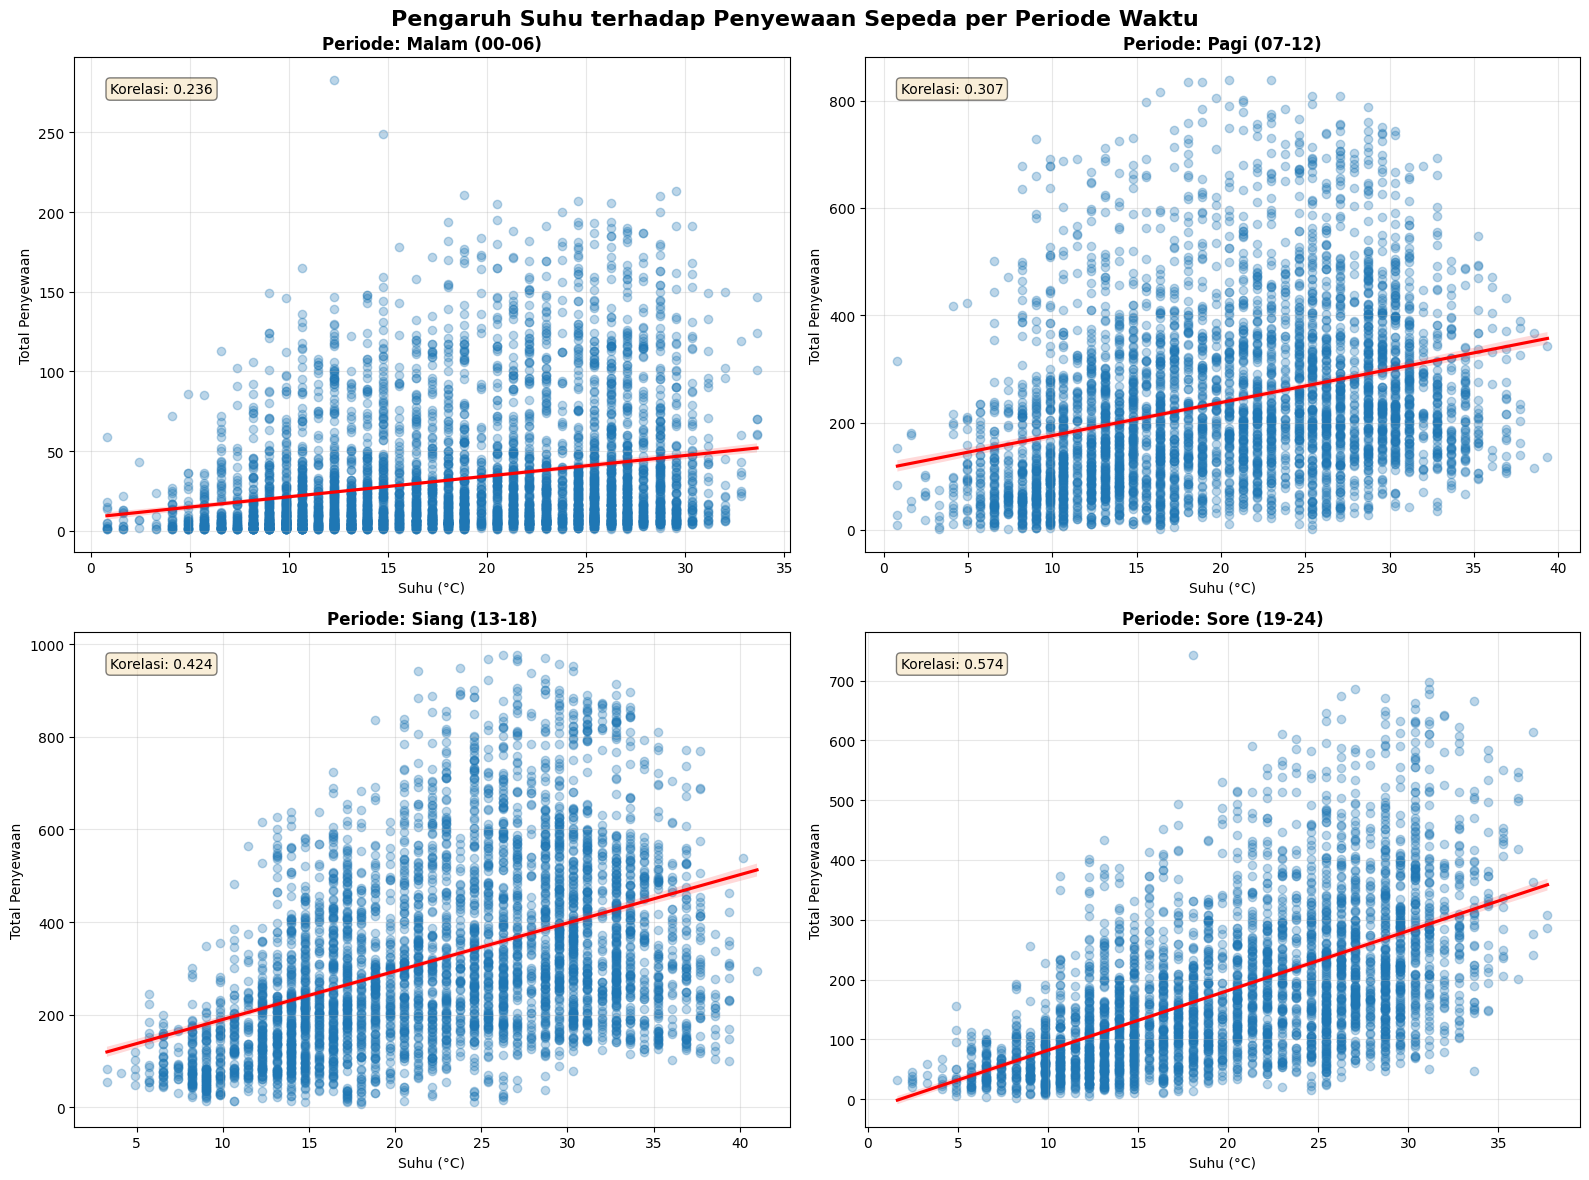

Korelasi suhu dengan penyewaan per periode waktu:
Malam (00-06): 0.2362
Pagi (07-12): 0.3074
Siang (13-18): 0.4236
Sore (19-24): 0.5742


In [28]:
# Konversi suhu dari normalisasi ke Celsius untuk hour_df
hour_df['temp_celsius'] = hour_df['temp'] * 41

# Membuat kategori jam
hour_df['hour_category'] = pd.cut(hour_df['hr'], bins=[-1, 6, 12, 18, 24], 
                                   labels=['Malam (00-06)', 'Pagi (07-12)', 'Siang (13-18)', 'Sore (19-24)'])

# Visualisasi pengaruh suhu pada penyewaan per kategori jam
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Pengaruh Suhu terhadap Penyewaan Sepeda per Periode Waktu', fontsize=16, fontweight='bold')

hour_categories = ['Malam (00-06)', 'Pagi (07-12)', 'Siang (13-18)', 'Sore (19-24)']
for idx, category in enumerate(hour_categories):
    ax = axes[idx // 2, idx % 2]
    data = hour_df[hour_df['hour_category'] == category]
    sns.regplot(x='temp_celsius', y='cnt', data=data, ax=ax, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    ax.set_title(f'Periode: {category}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Suhu (°C)', fontsize=10)
    ax.set_ylabel('Total Penyewaan', fontsize=10)
    ax.grid(alpha=0.3)
    
    # Hitung korelasi untuk setiap periode
    corr = data['temp_celsius'].corr(data['cnt'])
    ax.text(0.05, 0.95, f'Korelasi: {corr:.3f}', transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            verticalalignment='top')

plt.tight_layout()
plt.show()

print("Korelasi suhu dengan penyewaan per periode waktu:")
for category in hour_categories:
    data = hour_df[hour_df['hour_category'] == category]
    corr = data['temp_celsius'].corr(data['cnt'])
    print(f"{category}: {corr:.4f}")

**Insight:**
- Pengaruh suhu terhadap penyewaan bervariasi di setiap periode waktu
- Korelasi positif suhu-penyewaan paling kuat terjadi pada periode siang dan sore hari
- Pada malam hari, pengaruh suhu terhadap penyewaan relatif lebih lemah karena aktivitas penyewaan secara umum lebih rendah
- Periode pagi dan siang menunjukkan pola penyewaan yang lebih tinggi pada suhu yang lebih hangat

### Pertanyaan 4: Bagaimana kondisi cuaca dapat mempengaruhi jumlah penyewaan sepeda?

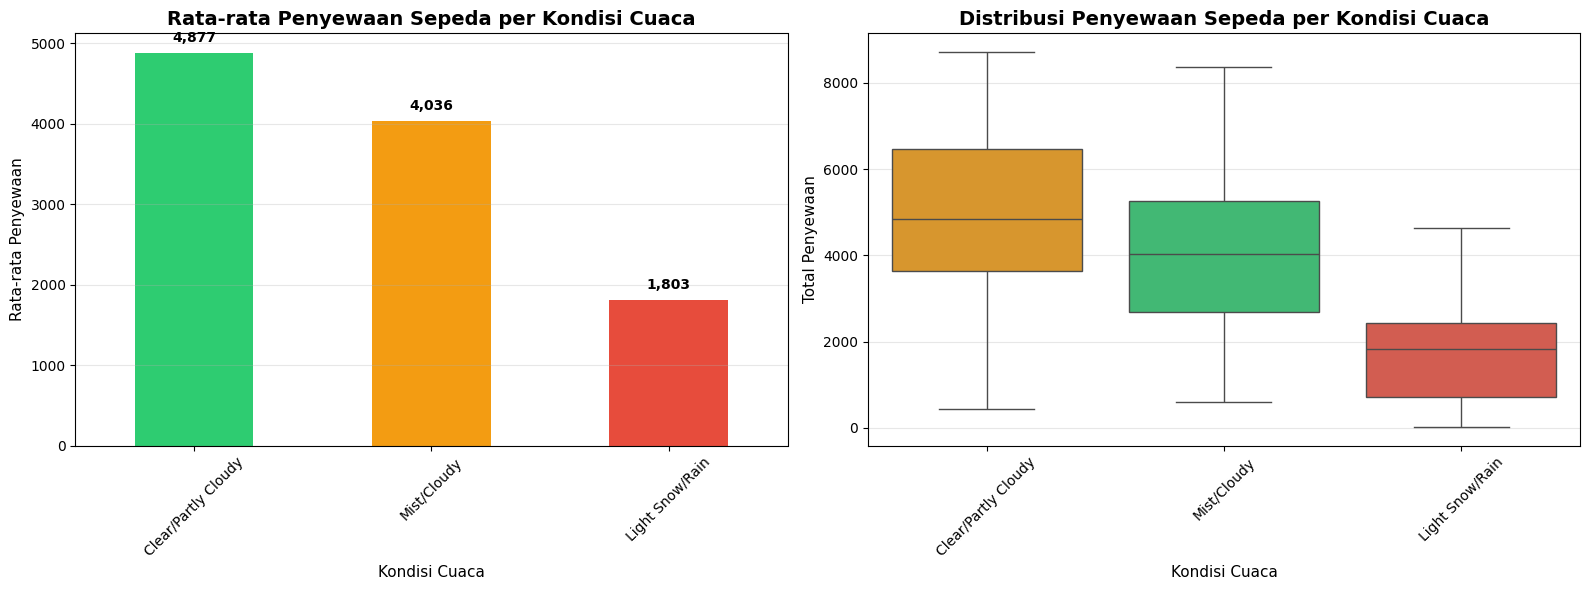


Statistik Penyewaan Berdasarkan Kondisi Cuaca:
                            mean      sum  count
weather_name                                    
Clear/Partly Cloudy  4876.786177  2257952    463
Mist/Cloudy          4035.862348   996858    247
Light Snow/Rain      1803.285714    37869     21

Kondisi cuaca terbaik untuk penyewaan: Clear/Partly Cloudy
Rata-rata penyewaan: 4,877


In [29]:
# Mapping kondisi cuaca
weather_labels = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

day_df['weather_name'] = day_df['weathersit'].map(weather_labels)

# Analisis penyewaan berdasarkan kondisi cuaca
rentals_by_weather = day_df.groupby('weather_name')['cnt'].agg(['mean', 'sum', 'count']).sort_values('mean', ascending=False)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Rata-rata penyewaan per kondisi cuaca
ax1 = rentals_by_weather['mean'].plot(kind='bar', ax=axes[0], color=['#2ECC71', '#F39C12', '#E74C3C', '#95A5A6'])
axes[0].set_title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kondisi Cuaca', fontsize=11)
axes[0].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(rentals_by_weather['mean']):
    ax1.text(i, v + 100, f'{v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Box plot distribusi penyewaan per kondisi cuaca
sns.boxplot(x='weather_name', y='cnt', data=day_df, ax=axes[1], 
            order=['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain'],
            hue='weather_name', palette=['#2ECC71', '#F39C12', '#E74C3C'], legend=False)
axes[1].set_title('Distribusi Penyewaan Sepeda per Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kondisi Cuaca', fontsize=11)
axes[1].set_ylabel('Total Penyewaan', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nStatistik Penyewaan Berdasarkan Kondisi Cuaca:")
print(rentals_by_weather)
print(f"\nKondisi cuaca terbaik untuk penyewaan: {rentals_by_weather['mean'].idxmax()}")
print(f"Rata-rata penyewaan: {rentals_by_weather['mean'].max():,.0f}")

**Insight:**
- Kondisi cuaca Clear/Partly Cloudy (cerah/sebagian berawan) menghasilkan rata-rata penyewaan tertinggi
- Cuaca buruk seperti Light Snow/Rain (hujan ringan/salju) menurunkan jumlah penyewaan secara signifikan
- Terdapat perbedaan yang jelas antara kondisi cuaca cerah dan buruk terhadap perilaku penyewaan
- Cuaca Mist/Cloudy (berkabut/berawan) masih menghasilkan penyewaan yang cukup tinggi, tidak jauh berbeda dari cuaca cerah

## Analisis Lanjutan (Opsional)

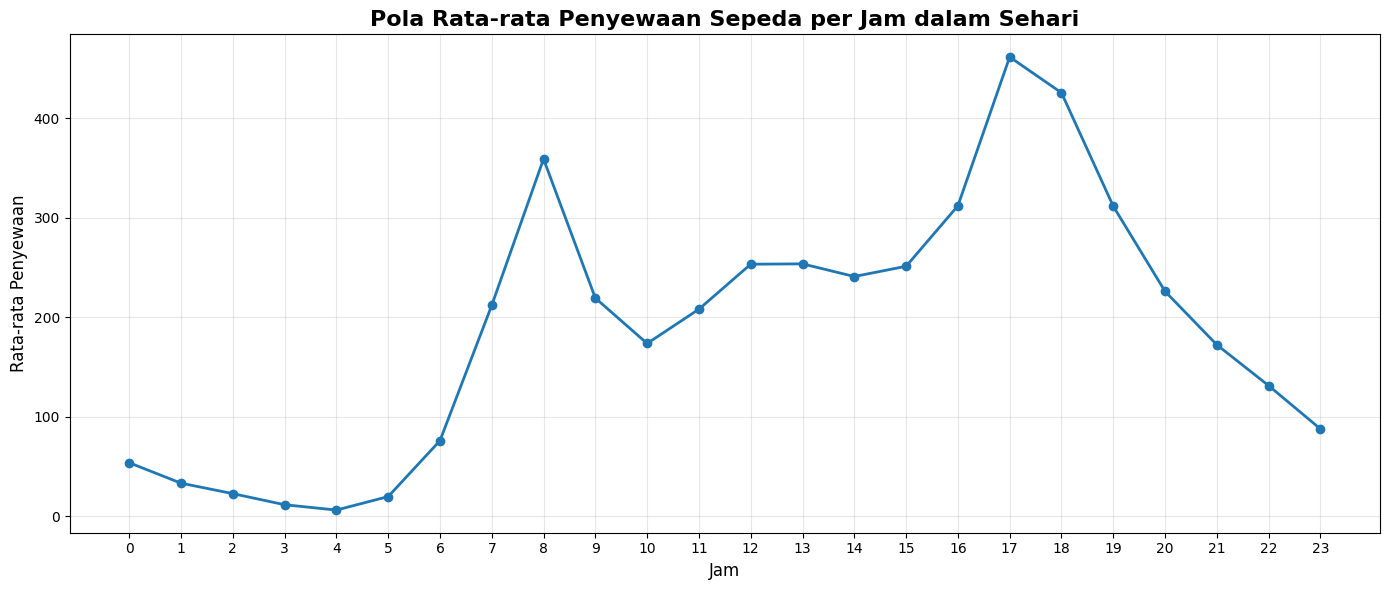

Jam dengan penyewaan tertinggi:
Jam 17:00 dengan rata-rata 461 penyewaan

Jam dengan penyewaan terendah:
Jam 4:00 dengan rata-rata 6 penyewaan


In [30]:
# Analisis pola penyewaan per jam dalam sehari
hourly_pattern = hour_df.groupby('hr')['cnt'].mean()

# Visualisasi pola penyewaan per jam
plt.figure(figsize=(14, 6))
plt.plot(hourly_pattern.index, hourly_pattern.values, marker='o', linewidth=2, markersize=6)
plt.title('Pola Rata-rata Penyewaan Sepeda per Jam dalam Sehari', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("Jam dengan penyewaan tertinggi:")
print(f"Jam {hourly_pattern.idxmax()}:00 dengan rata-rata {hourly_pattern.max():.0f} penyewaan")
print(f"\nJam dengan penyewaan terendah:")
print(f"Jam {hourly_pattern.idxmin()}:00 dengan rata-rata {hourly_pattern.min():.0f} penyewaan")

**Insight:**
- Terdapat dua puncak penyewaan (rush hour): pagi hari sekitar jam 7-8 dan sore hari sekitar jam 17-18
- Pola ini menunjukkan bahwa sepeda banyak digunakan untuk commuting (perjalanan kerja/sekolah)
- Penyewaan terendah terjadi pada dini hari (sekitar jam 3-4 pagi)
- Pola penggunaan menunjukkan perilaku yang konsisten dengan aktivitas harian masyarakat perkotaan

## Conclusion

### Kesimpulan Analisis Bike Sharing Dataset:

1. **Musim dan Penyewaan Sepeda:**
   - Musim Fall (Gugur) mencatat total penyewaan sepeda tertinggi, diikuti oleh Summer (Panas)
   - Spring (Semi) memiliki penyewaan terendah
   - Faktor cuaca musiman sangat berpengaruh terhadap perilaku penyewaan

2. **Pengaruh Suhu pada Penyewaan Harian:**
   - Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda
   - Suhu hangat (20-30°C) menghasilkan tingkat penyewaan optimal
   - Suhu ekstrem (terlalu dingin atau terlalu panas) cenderung menurunkan jumlah penyewaan

3. **Pengaruh Suhu pada Jam Tertentu:**
   - Pengaruh suhu terhadap penyewaan bervariasi di setiap periode waktu
   - Korelasi suhu-penyewaan paling kuat terjadi pada periode siang dan sore hari
   - Periode malam hari menunjukkan pengaruh suhu yang lebih lemah karena volume penyewaan rendah

4. **Kondisi Cuaca dan Penyewaan:**
   - Cuaca cerah/sebagian berawan (Clear/Partly Cloudy) menghasilkan rata-rata penyewaan tertinggi
   - Kondisi cuaca buruk (hujan/salju) secara signifikan menurunkan jumlah penyewaan
   - Perbedaan antara kondisi cuaca baik dan buruk sangat jelas mempengaruhi perilaku pengguna